# Troubleshooting Assistant


In [ ]:
!curl https://ollama.ai/install.sh | sh
!nohup ollama serve &
!ollama pull deepseek-r1:32b
!ollama list


In [ ]:
%pip install -U langchain-ollama

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama import OllamaLLM

template = """question:{question}
Answer: Let's think step by step"""

prompt = ChatPromptTemplate.from_template(template)

qwq_model = OllamaLLM(model="qwq:32b")

chain = prompt|qwq_model

chain.invoke({"question":"what car is the fastest car in the world"})

"<think>\nOkay, so I'm trying to figure out what the fastest car in the world is. Hmm, I've heard people talk about different cars being the fastest, but I'm not entirely sure which one holds the record right now. Let me start by recalling some information.\n\nI remember that Bugatti makes really fast cars. They have models like the Veyron and the Chiron. The Veyron was a big deal when it came out because it was the first car to officially go over 200 mph, if I'm not mistaken. But then they released the Chiron, which is even more powerful. I think the Chiron has something like 1500 horsepower. That's insane! So maybe that's the current holder?\n\nBut wait, I've also heard about a car called the Koenigsegg Jesko Absolut. Koenigsegg is another luxury and high-performance car manufacturer from Sweden. They claim to have set some records too. The Jesko might be one of their fastest models. I think they mentioned that it can go over 300 mph, which would make it faster than the Bugatti Chiro

In [ ]:
# install required modules
#%%capture --no-stderr
%pip install langchain_openai langchain_core langgraph
!pip install -q langgraph.checkpoint
!pip install -q langgraph.checkpoint.sqlite
!pip install -q load_dotenv
!sudo apt-get install graphviz graphviz-dev
!pip install -q pygraphviz
!pip install -q langchain-chroma
!pip install -q langchain-community

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from typing import TypedDict, Annotated, List, Optional
import json
import operator
from langgraph.checkpoint.sqlite import SqliteSaver
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, AIMessage, ChatMessage
from dotenv import load_dotenv
import os
from IPython.display import Image, display

from langchain.tools import BaseTool, StructuredTool, tool
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

_ = load_dotenv()
api_key = os.environ.get("OPENAI_API_KEY")
print(api_key)


#memory = SqliteSaver.from_conn_string(":memory:")

None


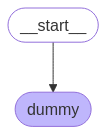

In [ ]:
class AgentState(TypedDict):
  """
  The shared states of the agents and tools.
  """
  task: str
  plan: str
  investigate: str
  incident_id: str
  incident_description: str
  incident_app_name: str
  service_map: str #topology

  #content: List[str]
  content: Annotated[list, operator.add]
  hypothesis: int
  hypothesis_description: str

  current_task: str

  selected_apitool: Optional[str]
  apitool_input: str
  apitool_output: str
  thought : str
  status: str

  iteration_number: int
  max_iterations: int
  ai_response: str
  human_reviewed_response: str

def dummy_node(state: AgentState) -> AgentState:
  return state

tbuilder = StateGraph(AgentState)
tbuilder.add_node("dummy",dummy_node)
tbuilder.set_entry_point("dummy")

testgraph = tbuilder.compile()

display(Image(testgraph.get_graph().draw_mermaid_png()))

In [ ]:
from langchain_openai import ChatOpenAI
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

model = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

#comment the following to use the OpenAI gpt-xxx  model
model = qwq_model

#test the model
messages = [
    SystemMessage(content="you are a math teacher"),
    HumanMessage(content="what is 7x8-3+5?")
]
response = model.invoke(messages)
print(response)

NameError: name 'deepseek_model' is not defined

In [ ]:
from langchain_core.pydantic_v1 import BaseModel

class Queries(BaseModel):
    queries: List[str]

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
"""
!!!run this block ONLY when need to refresh the Choma vector db
copy the .txt files to google drive's MyDrive/sumo_kb directory
"""

from langchain_community.document_loaders import TextLoader,DirectoryLoader
from langchain_openai import OpenAIEmbeddings
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
from google.colab import drive

#uncomment this when mounting the google drive to Colab for the first time
drive.mount('/content/gdrive')

loader = DirectoryLoader("/content/gdrive/MyDrive/sumo_kb/",  glob="**/*.txt", show_progress=True, loader_cls=TextLoader)
raw_documents = loader.load()
text_splitter = CharacterTextSplitter(separator="\n",chunk_size=1000, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)
morethan3words = [x for x in documents if (len(x.page_content) > 3 and not(x.page_content.startswith("URL:")) ) ]
db = Chroma.from_documents(morethan3words,HuggingFaceEmbeddings())


In [ ]:
#vector db test code
query = "aws related incidents"
docs = db.similarity_search(query,k=5)
print(docs[0].page_content)

In [ ]:
#wrappers for sumo api calls

import requests

def get_service_map(apitool_input: str) -> str:
    #calling Sumo serviceMap API
    access_id = userdata.get('SUMO_ACCESS_ID')
    access_key = userdata.get('SUMO_ACCESS_KEY')
    url = "https://api.sumologic.com/api/v1/tracing/serviceMap"

    response = requests.get(url, auth=(access_id, access_key))

    if response.status_code == 200:
      print("Request successful!")
      print(response.text)
      return response.text
    else:
      print(f"Request failed with status code: {response.status_code}")
      return "__service_map_api_call_failed__"

def get_configuration_changes(apitool_input: str) -> str:
    #calling Sumo configuration change API
    return "configuration changes"

def query_logs(apitool_input: str) -> str:
    #calling Sumo query logs API
    return "log files"

def query_metrics(apitool_input: str) -> str:
    #calling Sumo query metrics API
    return "metrics"

def query_traces(apitool_input: str) -> str:
    #calling Sumo query traces API
    return "traces"


#api tools
class ApiTool(BaseTool):
    name: str
    description: str
    func: callable
    def _run(self, apitool_input: str):  # Implement the abstract _run method
      return self.func(apitool_input)

api_tools = [
    ApiTool(
        name="get_service_map",
        description="retrieve application service dependency map",
        func=get_service_map("")
    ),
    ApiTool(
        name="get_configuration_changes",
        description="retrieve configuration changes for an application service ",
        func=get_configuration_changes("")
    ),
    ApiTool(
        name="query_logs",
        description="query logs for an application service ",
        func=query_logs("")
    ),
    ApiTool(
        name="query_metrics",
        description="query metrics for an application service ",
        func=query_metrics("")
    ),
    ApiTool(
        name="query_traces",
        description="query traces for an application service ",
        func=query_traces("")
    ),

]



def sumo_api_call(state: AgentState) -> AgentState:
    """Place calls to Sumo Logic APIs endpoints,e.g.
    - get service map, ie. dependency topology
    - get configuration change history - api exists?
    - get log search query
    - query metrics
    - etc...
    still to be implemented.
    might need to be implmemented as multiple tool nodes
    """

    tool = next((t for t in api_tools if t.name == state.selected_apitool), None)
    if not tool:
        return AgentState(
            status="ERROR",
            thought="Selected Sumo API tool not found"
        )
    try:
        result = tool.func.invoke(state.apitool_input)
        #result = await tool.func.ainvoke(state.apitool_input)
        return AgentState(
            apitool_output=str(result),
            status=f"{{'api_name':{t.name}, 'api_input':{state.apitool_input} }}"
        )
    except Exception as e:
        return AgentState(
            status="ERROR",
            apitool_output=str(e),
            thought=f"Sumo API tool execution failed: {str(e)}"
        )



Request failed with status code: 401


/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:502: UserWarning: <built-in function callable> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


In [ ]:
def get_past_incidents(incident_desc:str)->str:
  query = incident_desc
  docs = db.similarity_search(query,k=10)
  past_incidents = ''
  ii = 1
  for doc in docs:
    past_incidents += str(ii)+"-"+doc.page_content + "\n"
    ii += 1
  print(past_incidents)
  return past_incidents

def get_incident_app_name(incident_id:str)->str:
  return "__ dummy app name __"

In [ ]:
#plan & hypothesize
def plan_hypothesize_node(state: AgentState):
    #
    # 1. call to knowlege base (GrapshRAG)
    # 2. provide more contexts -> SystemMessage
    #
    incident_app_name = get_incident_app_name(state["incident_id"])
    past_incidents = get_past_incidents(state["incident_description"])

    plan_context = f"""Your are a virtual SRE or OCE, tasked with
    investigating and remediating the incident{state["incident_description"]} reported in the Sumo logic ticket system
    with the historical incident report as in {past_incidents}
    """
    prompt = state['task'] + """
      Return your suggestion in the following JSON format (no extra text):

      {{
        "plan": "Your triage,investigate,mitigate plan here",
        "hypothesis": "your hypothesises of what could have cause the problem here, if there are multiple, please number them",
      }}

      Make sure the output is valid JSON.
    """

    messages = [
        SystemMessage(content=plan_context),
        HumanMessage(content=prompt)
    ]
    response = model.invoke(messages)
    result = json.loads(response)
    print(result)

    return AgentState(
        incident_app_name=incident_app_name,
        content=result["content"],
        plan=result["plan"],
        hypothesis_description=result["hypothesis"],
        current_task="plan_hypothesize",
        selected_apitool="get_service_map",
        apitool_input=incident_app_name,
        iteration_number=state["iteration_number"] + 1,
        ai_response=response.content
    )

In [ ]:
def human_review_node(state: AgentState) -> AgentState:
    """
    SREs or OCEs review the following depending on the current task
    - hypothesis and dependency topology before finalization.
    - investigation results
    and decide the next steps
    """
    #print(graph.get_state({"configurable": {"thread_id": "1"}}))
    if (state["ai_response"]) :
        print(f"System Response: {state['ai_response']}") #saved responses from previous step

    #process
    if (state["current_task"]) == "plan_hypothesize":
        print("reviewing plan_hypothesize")
        ai_plan = state["plan"]
        print(ai_plan)
        ai_hypothesis = state["hypothesis_description"]
        print(ai_hypothesis)
        app_name = state["incident_app_name"]
        print(app_name)

        if (state["status"]!= "ERROR") :
          api_out = json.loads(state["apitool_output"])
          state["service_map"] = api_out
        if (api_out["api_name"] == "get_service_map"):
            print(f"here is the service_map for {app_name}"+api_out)
        human_input = input("Approve? (yes/no/edit): ")  # SRE confirmation

        if human_input.lower() == "yes":
          state["current_task"] = "investigate_topology"
          state["investigate"] = f"investigate services topology for {app_name}"
          return state
    #config change tool call (get_configuration_changes()) returned
    elif (state["current_task"]) == "investigate_configuration_change":
        print("investigate_configuration_change")


    human_input = input("Approve? (yes/no/edit): ")  # Human validation
    if human_input.lower() == "yes":
        state.human_reviewed_response = state.ai_response
    elif human_input.lower() == "edit":
        state.human_reviewed_response = input("Enter corrected response: ")
    else:
        state.human_reviewed_response = "Human rejected the AI response."
    return state

In [ ]:
def investigate_topo_node(state: AgentState):
    #
    # 1. ?? call to knowlege base (GrapshRAG)
    # 2. provide more contexts, what more context could we add here?  e.g. summarized logs?
    #

    investigate_context = f"""Your are a virtual SRE or OCE, tasked with
investigating and remediating the incident{state["incident_description"]} reported in the Sumo logic ticket system,
the possible reasons for this incident are  {state['hypothesis_description']}

    """
    prompt = state['investigate'] + """
    , Triage the situation and identify the most probable reason among the following 5 hypothesises:
    1. changes in configuration were made in some components in the service map，e.g. new software version, new configuration, etc.
    2. external factors changed, e.g. user visits volume
    3. resource limit reached for the components in the service map
    4. services hang
    5. services components failed

    Return your suggestion in the following JSON format (no extra text):

    {{
        "hyphthesis_id": "the sequence number of the most probable hypothesis",
        "suggested tools": "your suggestion of the tools to use for further investigation",
    }}

      Make sure the output is valid JSON.

    """

    messages = [
        SystemMessage(content=investigate_context),
        HumanMessage(content=prompt)
    ]

    response = model.invoke(messages)
    result = json.loads(response)
    print(result)

    return AgentState(
        incident_app_name=incident_app_name,
        content=result["content"],
        hypothesis=result["hypothesis_id"],
        current_task="confirm_hypothesis",
        iteration_number=state["iteration_number"] + 1,
        ai_response=response.content
    )

In [ ]:
def config_change_node(state: AgentState):
    #
    # 1. query knowlege base (GrapshRAG) to retrieve best practices for investigating problems caused by configuration changes
    # 2. provide more contexts -> SystemMessage
    #
    best_practices = query_KB_direct("best practices for investigating problems caused by configuration changes")

    config_change_context = f"""Your are a virtual SRE or OCE, tasked with
    investigating and remediating the incident{state["incident_description"]} reported in the Sumo logic ticket system,
    Now we know it's highly probable that configure changes might have cause the problem.
    and Here are the best practices for investigating problems caused by configuration changes - {best_practices}
    """
    prompt = f"""

    Review the {state['service_map']} and {state['incident_description']}, recommend a list of service components to be investigated for configuration changes.

      Return your suggestion in the following JSON format (no extra text):

      {{
        "component_list": "a list of service component to be investigated for configuration changes",
      }}

      Make sure the output is valid JSON.
    """

    messages = [
        SystemMessage(content=config_change_context),
        HumanMessage(content=prompt)
    ]
    response = model.invoke(messages)
    result = json.loads(response)
    print(result)

    return AgentState(
        incident_app_name=incident_app_name,
        content=result["content"],
        current_task="investigate_configuration_change",
        selected_apitool="get_configuration_changes",
        apitool_input=result['component_list'],
        iteration_number=state["iteration_number"] + 1,
        ai_response=response.content
    )



In [ ]:
def external_change_node(state: AgentState):
    messages = [
        SystemMessage(content=HYPTHESIS_PROMPT),
        HumanMessage(content=state['task'])
    ]
    response = model.invoke(messages)
    return {"ext_change": response.content}

In [ ]:
def resource_limit_node(state: AgentState):
    #
    # 1. call to metrics tool and check if any resources are about to reach limit
    #

    queries = model.with_structured_output(Queries).invoke([
        SystemMessage(content=HYPTHESIS_PROMPT),
        HumanMessage(content=state['task'])
    ])
    content = state['content'] or []
    return {"content": content}

In [ ]:
def service_hang_node(state: AgentState):
    #
    # 1. call to log summariztion or reduce tool and check if any service is in hang state
    #

    queries = model.with_structured_output(Queries).invoke([
        SystemMessage(content=HYPTHESIS_PROMPT),
        HumanMessage(content=state['task'])
    ])
    content = state['content'] or []
    return {"content": content}

In [ ]:
def component_failure_node(state: AgentState):
    #
    # 1. call to log summariztion or reduce tool and check if any components or depended components failed
    #

    queries = model.with_structured_output(Queries).invoke([
        SystemMessage(content=HYPTHESIS_PROMPT),
        HumanMessage(content=state['task'])
    ])
    content = state['content'] or []
    return {"content": content}

In [ ]:
def remediation_node(state: AgentState):
    #
    # 1. execute remediation actions
    #

    queries = model.with_structured_output(Queries).invoke([
        SystemMessage(content=HYPTHESIS_PROMPT),
        HumanMessage(content=state['task'])
    ])
    content = state['content'] or []
    return {"content": content}

In [ ]:
# tools
def query_KB_direct(query : str) -> str :
    #query knowledge base directly
    # to be implemented
    return ""


def query_knowledge_base(state: AgentState) -> AgentState:
    """Query the knowledge base implemented as a GraphRAG,  possibly retrieve  :
    - similar incident's investigation log
    - past incident analysis
    - suggested remediation actions that maps to the root causeidentified
    - etc...
    still to be implemented.
    """

    kb_entries =  query_KB_direct('find sth??')
    content = state['content'] or []
    return {"content": content}

def log_summarization(state: AgentState) -> AgentState:
    """Summarize the log with a different specialized LLM, e.g. fine tuned Bert :
    - ? can use Sumo's LogReduce?.
    still to be implemented.
    """
    content = state['content'] or []
    return {"content": content}

In [ ]:
def should_continue(state):
    if state["iteration_number"] > state["max_interations"]:
        return END
    if state["hypothesis"] == 1 :
      return "changed sth?"
    if state["hypothesis"] == 2 :
      return "external changes?"
    if state["hypothesis"] == 3 :
      return "resource reach limit?"
    if state["hypothesis"] == 4 :
      return "service hang?"
    if state["hypothesis"] == 5 :
      return "component failed?"
    return END

In [ ]:
builder = StateGraph(AgentState)

In [ ]:
builder.add_node("plan_hypothesize", plan_hypothesize_node)
builder.add_node("investigate topology", investigate_topo_node)
builder.add_node("changed sth?", config_change_node)
builder.add_node("external changes?", external_change_node)
builder.add_node("resource reach limit?", resource_limit_node)
builder.add_node("service hang?", service_hang_node)
builder.add_node("component failed?", component_failure_node)
builder.add_node("remediate", remediation_node)
builder.add_node("SRE review", human_review_node)
builder.add_node("sumo api call", sumo_api_call)
#builder.add_node("query knowledge base", query_knowledge_base)
builder.add_node("log summarization", log_summarization)

In [ ]:
builder.set_entry_point("plan_hypothesize")

In [ ]:
builder.add_conditional_edges(
    "investigate topology",
    should_continue,
    {END: END,
     "changed sth?": "changed sth?",
     "external changes?":"external changes?",
     "resource reach limit?":"resource reach limit?",
     "service hang?":"service hang?",
     "component failed?":"component failed?"}
)

builder.add_edge("plan_hypothesize", "SRE review")
builder.add_edge("plan_hypothesize", "sumo api call")

#builder.add_edge("plan_hypothesize", "query knowledge base")
#builder.add_edge("query knowledge base", "SRE review")
builder.add_edge("plan_hypothesize", "SRE review")

builder.add_edge("SRE review", "investigate topology")
builder.add_edge("SRE review", "remediate" )
builder.add_edge("investigate topology","sumo api call")
builder.add_edge("sumo api call","SRE review")
builder.add_edge("log summarization","SRE review")
builder.add_edge("changed sth?","sumo api call")
builder.add_edge("external changes?","log summarization")
builder.add_edge("resource reach limit?","sumo api call")
builder.add_edge("component failed?","sumo api call")
builder.add_edge("component failed?","log summarization")
builder.add_edge("service hang?","log summarization")
builder.add_edge("remediate", END )

In [ ]:
#with memory as m:
#  graph = builder.compile(checkpointer=m)
graph = builder.compile()

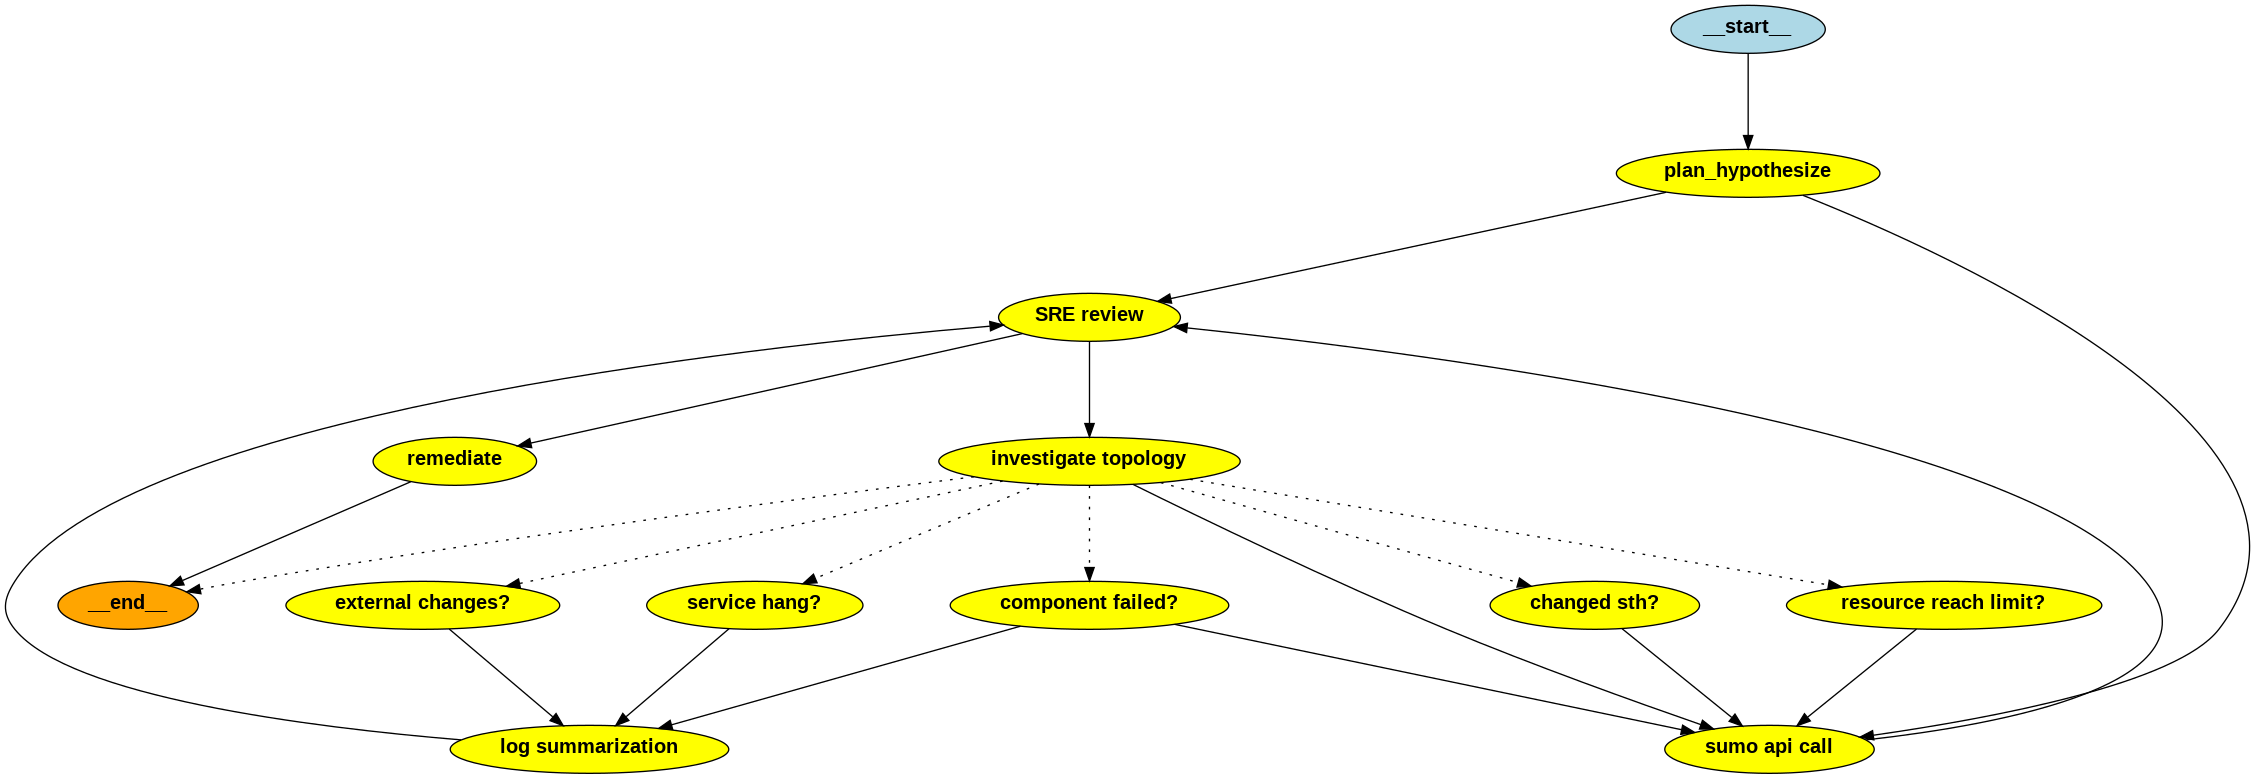

In [ ]:
#from IPython.display import Image
from IPython.display import Image, display

#from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
#display(Image(graph.get_graph().draw_mermaid_png()))
display(Image(graph.get_graph().draw_png()))

In [ ]:
#Initialize the incident related data
incident_id = "xxx_service_001"
incident_description = "xxx"

MAX_ITERATIONS = 25

thread = {"configurable": {"thread_id": "1"}}
for s in graph.stream({
    'task': "Propose a triage,investigate and mitigate/remediate plan for this incident or problem, and draw up as many as possible hypothesis on why could cause the problem",
    "incident_id": incident_id,
    "incident_description": incident_description,
    "hypothesis": 1,
    "max_iterations": MAX_ITERATIONS,
    "iteration_number": 1,
}, thread):
    print(s)

In [ ]:
!pip install mermaid-python


In [ ]:
!pip install grandalf


In [ ]:
from mermaid import Mermaid
Mermaid("graph TB\na-->b")
Mermaid("""
graph TB
SRE_review --> investigate_topology;
	SRE_review --> query_knowledge_base;
	SRE_review --> remediate;
	__start__ --> plan_hypothesize;
	changed_sth_ --> sumo_api_call;
	component_failed_ --> log_summarization;
	component_failed_ --> sumo_api_call;
	external_changes_ --> log_summarization;
	investigate_topology --> SRE_review;
	investigate_topology --> sumo_api_call;
	plan_hypothesize --> SRE_review;
	plan_hypothesize --> query_knowledge_base;
	plan_hypothesize --> sumo_api_call;
	remediate --> __end__;
	resource_reach_limit_ --> sumo_api_call;
	service_hang_ --> log_summarization;
	investigate_topology -.-> __end__;
	investigate_topology -.-> changed_sth_;
	investigate_topology -.-> external_changes_;
	investigate_topology -.-> resource_reach_limit_;
	investigate_topology -.-> service_hang_;
	investigate_topology -.-> component_failed_;
""")
#print(graph.get_graph().draw_ascii())

In [ ]:
!curl -u "suJp7vD7Ue71da:JMQvGt0SZlISSWdFWQ6paI0A9sdazr03VBCZAT7BPGK7IFTy9f5WlMNKTqJhWKRD" -X GET https://api.sumologic.com/api/v1/tracing/serviceMap


In [ ]:
import requests

username = "suJp7vD7Ue71da"
password = "JMQvGt0SZlISSWdFWQ6paI0A9sdazr03VBCZAT7BPGK7IFTy9f5WlMNKTqJhWKRD"
url = "https://api.sumologic.com/api/v1/tracing/serviceMap"

response = requests.get(url, auth=(username, password))

if response.status_code == 200:
    print("Request successful!")
    print(response.text)
else:
    print(f"Request failed with status code: {response.status_code}")

Request failed with status code: 401


In [ ]:
!pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import time
import os

# Please verify that scraping https://help.sumologic.com/ complies with its robots.txt and terms of service before running.

def is_valid(url):
    """
    Checks whether the URL has a valid scheme and network location.
    """
    parsed = urlparse(url)
    return bool(parsed.scheme) and bool(parsed.netloc)

def is_binary_file(url):
    try:
        response = requests.head(url)
        #response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        content_type = response.headers.get('Content-Type', '')
        return not content_type.startswith('text/')
    except requests.exceptions.RequestException:
        return False

def get_internal_links(url, base_domain):
    """
    Given a URL, returns a set of internal (same-domain) absolute URLs found on that page.
    """
    internal_links = set()
    if (is_binary_file(url)):
        print(f"Getting URLs - Skipping binary file: {url}")
        return None
    try:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Warning: Received status code {response.status_code} for URL: {url}")
            return internal_links
    except Exception as e:
        print(f"Error fetching {url}: {e}")
        return internal_links

    soup = BeautifulSoup(response.content, "html.parser")
    # Look for all anchor tags with an href attribute.
    for a_tag in soup.find_all("a", href=True):
        href = a_tag["href"]
        # Skip email or telephone links.
        if href.startswith("mailto:") or href.startswith("tel:"):
            continue
        # Build an absolute URL.
        absolute_url = urljoin(url, href)
        # Remove URL fragments (anything after a #).
        absolute_url = absolute_url.split("#")[0]
        # Only add if the URL is valid and in the same domain.
        if is_valid(absolute_url):
            parsed = urlparse(absolute_url)
            if base_domain in parsed.netloc:
                internal_links.add(absolute_url)
    return internal_links



def scrape_page(url):
    """
    Fetches the content of the page at `url` and returns its text content.
    """
    if url.endswith(".mp4"):
        print(f"Skipping mp4: {url}")
        return None

    if (is_binary_file(url)):
        print(f"Skipping binary file: {url}")
        return None

    try:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Non-200 status code {response.status_code} for URL: {url}")
            return None
    except Exception as e:
        print(f"Error fetching {url}: {e}")
        return None

    soup = BeautifulSoup(response.content, "html.parser")
    # Get visible text; you might want to customize this extraction.
    text = soup.get_text(separator="\n", strip=True)
    return text

def scrape_website(start_url, base_domain, delay=1):
    """
    Crawls the website starting from `start_url`, collects text content from each page,
    and returns a dictionary mapping URLs to their scraped text.
    """
    visited = set()
    to_visit = [start_url]
    scraped_data = {}

    while to_visit:
        current_url = to_visit.pop(0)
        if current_url in visited:
            continue
        print(f"Scraping: {current_url}")
        visited.add(current_url)

        # Scrape the page content.
        content = scrape_page(current_url)
        if content:
            scraped_data[current_url] = content

        # Extract internal links and add them to the queue.
        links = get_internal_links(current_url, base_domain)
        if links :
          for link in links:
            if link not in visited and link not in to_visit:
                to_visit.append(link)

        # Respectful delay between requests.
        time.sleep(delay)

    return scraped_data

def save_scraped_content(scraped_data, output_dir="scraped_content"):
    """
    Saves the scraped content from each URL into a text file.
    The filename is derived from the URL path.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for url, content in scraped_data.items():
        parsed = urlparse(url)
        # Create a filename based on the path. If path is empty, use "home".
        filename = parsed.path.strip("/").replace("/", "_")
        if not filename:
            filename = "home"
        filename += ".txt"
        file_path = os.path.join(output_dir, filename)

        with open(file_path, "w", encoding="utf-8") as f:
            f.write(f"URL: {url}\n\n")
            f.write(content)
        print(f"Saved content from {url} to {file_path}")

if __name__ == "__main__":
    # Starting URL for the Sumo Logic help site.
    start_url = "https://help.sumologic.com/"
    # Base domain to restrict crawling (adjust as needed).
    base_domain = "sumologic.com"

    print("Starting website scrape...")
    scraped_data = scrape_website(start_url, base_domain, delay=1)
    print(f"Scraped {len(scraped_data)} pages.")

    print("Saving scraped content...")
    save_scraped_content(scraped_data)
    print("Scraping complete.")
